1. Setup and Imports
Libraries used: pandas, seaborn, matplotlib.pyplot, numpy, sklearn.
Imports necessary modules for data manipulation, visualization, preprocessing, and modeling.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. Data Loading
Loads the dataset from housing.csv into a Pandas DataFrame (df).

In [42]:
df = pd.read_csv('housing.csv') # Load the data

3. Data Exploration
Displays the first 5 rows of the dataset using df.head().
Summarizes data structure with df.info() (10 columns, 20,640 rows, mixed data types: 9 float64, 1 object).
Checks for missing values with df.isnull().sum():
total_bedrooms has 207 missing values; other columns have none.

In [43]:
#data exploration 
print(df.head())
print(df.info())
print(df.isnull().sum())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

4. Data Cleaning
Removes rows with missing values using df.dropna().
Verifies no missing values remain with df.isna().sum().

In [44]:
#drobing null values
df=df.dropna()
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

5.Histogram Visualizations for Numeric Columns
This section generates histograms with kernel density estimation (KDE) curves for all numeric columns in the housing dataset to explore their distributions.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


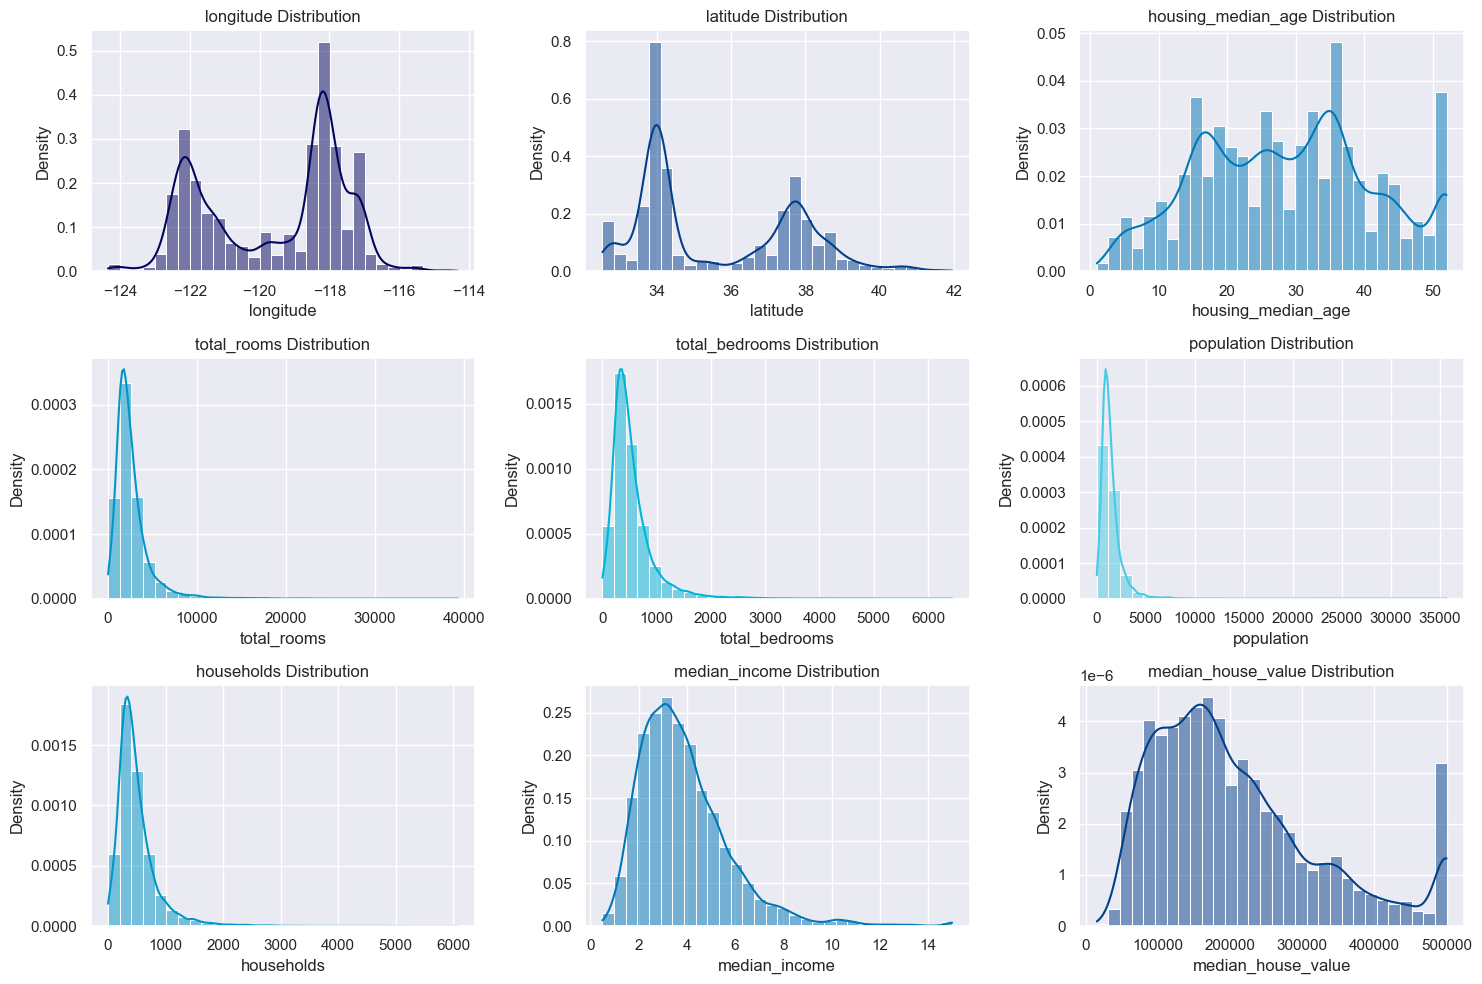

In [45]:

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)
#colors
colors = ['#03045E', '#023E8A', '#0077B6', '#0096C7', '#00B4D8', 
          '#48CAE4','#0096C7', '#0077B6','#023E8A']

# Set up the plot
plt.figure(figsize=(15, 10))
n_cols = 3 
n_rows = int(np.ceil(len(numeric_cols) / n_cols)) # Calculate the number of rows based on the number of columns and the total number of plots

# Plot histograms with KDE for all numeric columns 
for i, col in enumerate(numeric_cols):
    sns.set(style='darkgrid')
    plt.subplot(n_rows, n_cols, i + 1)# 3*3
    sns.histplot(df[col], kde=True, color=colors[i], bins=30, stat='density')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

6.Scatter Plots for House Value Relationships: 
This section generates two scatter plots to explore the relationships between median_house_value and two features (median_income and total_rooms) in the housing dataset.

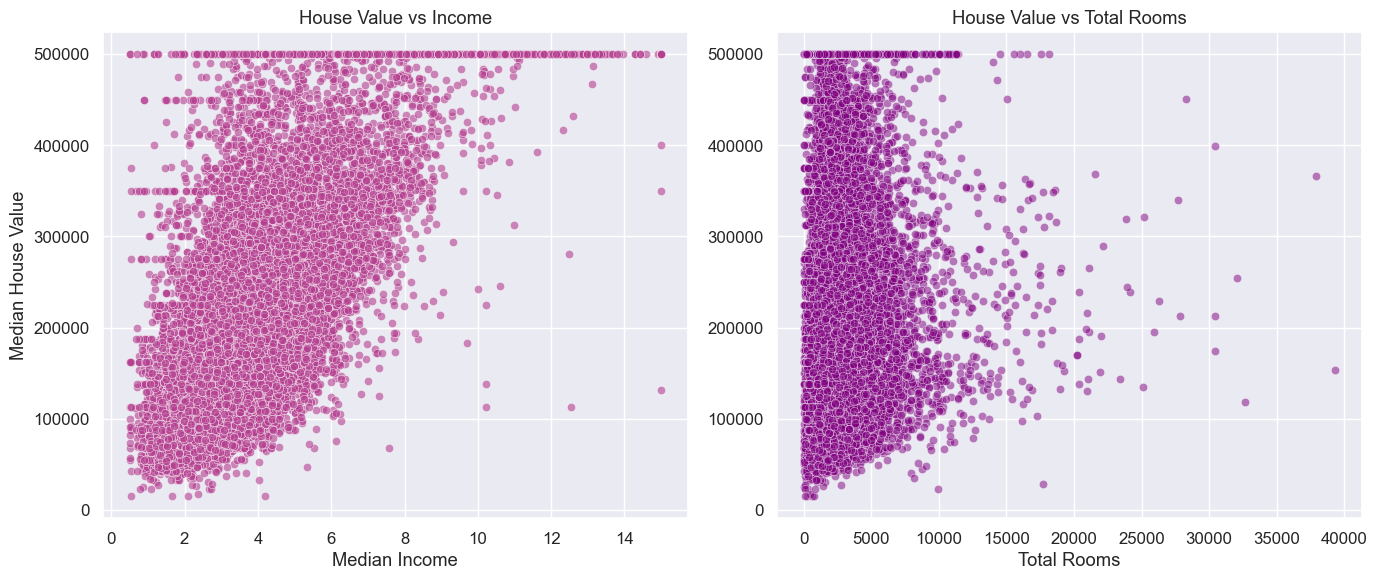

In [46]:
# Set style
sns.set(style='darkgrid', font_scale=1.1)

# Create figure with 1 row and 2 columns
plt.figure(figsize=(14, 6))

# Scatter: Median Income vs Median House Value
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.6, color='#b43e8f')
plt.title('House Value vs Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Scatter: Total Rooms vs Median House Value
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='total_rooms', y='median_house_value', alpha=0.5, color='purple')
plt.title('House Value vs Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('')

# Layout adjustment
plt.tight_layout()
plt.show()

7.Correlation Heatmap for Numeric Features
This section generates a heatmap to visualize the correlations between numeric columns in the housing dataset.

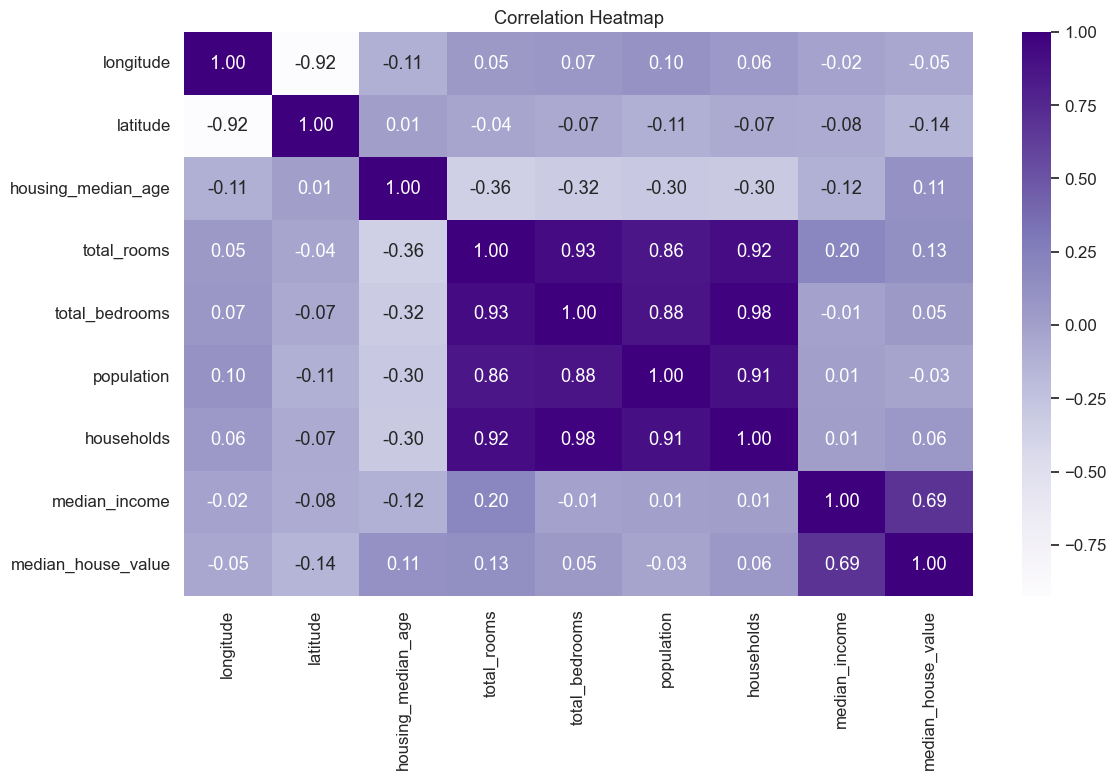

In [47]:
#select numerical values 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Set up the plot
plt.figure(figsize=(12, 8))
#heatmap to visualize the correlations between numeric columns in the housing dataset.
sns.heatmap(numeric_df.corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Heatmap')
# Layout adjustment
plt.tight_layout()
plt.show()

7.Data Preparation for Machine Learning
This section prepares the housing dataset for modeling by selecting features, splitting data into training and test sets, and scaling the features.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'latitude', 'longitude']
X = df[features]
y = df['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

8.Simple Linear Regression with Median Income
This section performs simple linear regression to predict median_house_value using median_income as the sole predictor, evaluates the model, and visualizes the results

R²: 0.4720, MSE: 7221011204.2350


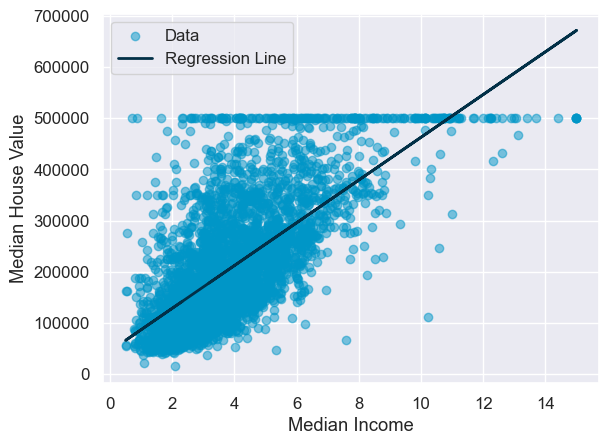

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select one feature
X_train_single = X_train[['median_income']]
X_test_single = X_test[['median_income']]

# Fit model
lr = LinearRegression()
lr.fit(X_train_single, y_train)

# Predict
y_pred = lr.predict(X_test_single)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R²: {r2:.4f}, MSE: {mse:.4f}")

# Visualize
plt.scatter(X_test_single, y_test, color='#0096c7', alpha=0.5, label='Data')
plt.plot(X_test_single, y_pred, color='#023047', label='Regression Line',linewidth=2 )
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

9.Multiple Linear Regression with All Features: 
This section performs multiple linear regression to predict median_house_value using all selected features, evaluates the model, and compares its performance to the simple linear regression model.

In [50]:
# Fit multiple linear regression
lr_multi = LinearRegression()
lr_multi.fit(X_train_scaled, y_train)

# Predict
y_pred_multi = lr_multi.predict(X_test_scaled)

# Evaluate
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
print(f"Multiple Linear Regression - R²: {r2_multi:.4f}, MSE: {mse_multi:.4f}")

# Compare with simple linear regression
print(f"Simple Linear Regression - R²: {r2:.4f}, MSE: {mse:.4f}")

Multiple Linear Regression - R²: 0.6401, MSE: 4921881237.6281
Simple Linear Regression - R²: 0.4720, MSE: 7221011204.2350


10.Visualization
For Multiple Linear Regression:Creates a scatter plot of test data .

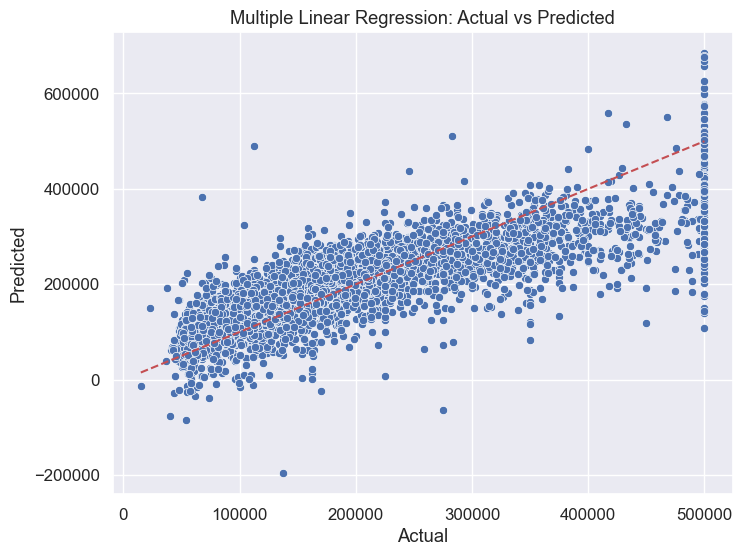

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

11. Polynomial Regression
Uses sklearn to perform polynomial regression with degrees 2, 3, and 4 to model the relationship between median_income and median_house_value.
Pipeline:
PolynomialFeatures(degree): Generates polynomial features.
StandardScaler(): Scales features.
LinearRegression(): Fits the model.
Steps:
Fits model on training data (X_train[['median_income']] and y_train).
Predicts on test data (X_test[['median_income']]).
Evaluates performance with R² and Mean Squared Error (MSE).
Prints results for each degree (e.g., Polynomial Degree 2 - R²: X.XXXX, MSE: X.XXXX).

. Visualization
For each polynomial degree (2, 3, 4):
Creates a scatter plot of test data (median_income vs. median_house_value).
Plots the fitted polynomial curve.
Labels axes (Median Income, Median House Value), adds a legend, and titles the plot (e.g., Polynomial Regression (Degree 2)).
Displays the plot using plt.show().

Polynomial Degree 2 - R²: 0.4760, MSE: 7166094383.1424


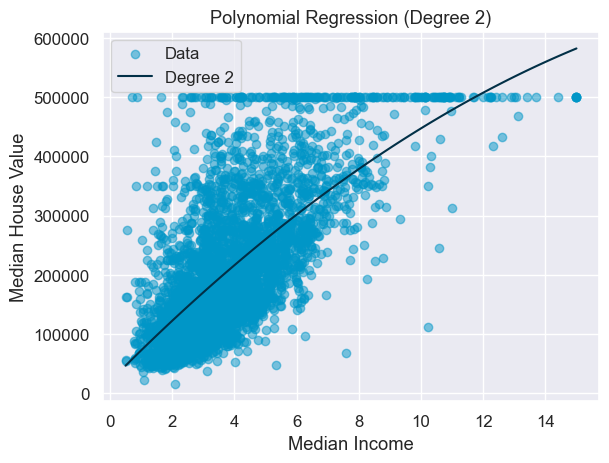

Polynomial Degree 3 - R²: 0.4809, MSE: 7098261367.1947


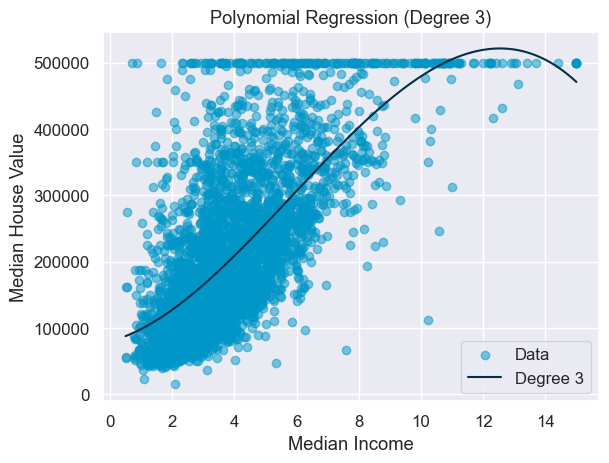

Polynomial Degree 4 - R²: 0.4812, MSE: 7094618871.9489


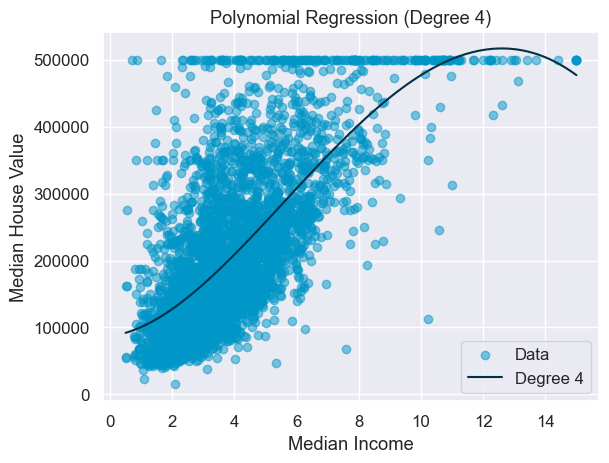

In [52]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.pipeline import make_pipeline 
import numpy as np

# polynomial degrees
degrees = [2, 3, 4]

for degree in degrees:
    polyreg = make_pipeline(PolynomialFeatures(degree),StandardScaler(),LinearRegression())

    # Fit the model and Reshape to 2D array (-1, 1)
    polyreg.fit(X_train[['median_income']].values.reshape(-1, 1), y_train)
    
    # Predict
    y_pred_poly = polyreg.predict(X_test[['median_income']].values.reshape(-1, 1))
    
    # Evaluate
    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    print(f"Polynomial Degree {degree} - R²: {r2_poly:.4f}, MSE: {mse_poly:.4f}")
    
    #visulize
    plt.scatter(X_test['median_income'], y_test,color='#0096c7',label='Data',alpha=0.5)
    
    # Generate a smooth range of median_income values for plotting the polynomial curve
    X_range = np.linspace(X_test['median_income'].min(), X_test['median_income'].max(), 100).reshape(-1, 1)
    # Predict median_house_value for the smooth range using the trained model
    y_range = polyreg.predict(X_range)
    
    # regresuion line
    plt.plot(X_range, y_range, color='#023047',label=f'Degree {degree}')
    # Show the plot
    plt.xlabel('Median Income')  
    plt.ylabel('Median House Value') 
    plt.legend()  
    plt.title(f'Polynomial Regression (Degree {degree})')  
    plt.show()  

Model Performance Comparison: Linear vs Polynomial Regression

1. **Import required modules** for polynomial feature transformation and pipeline creation.
2. Build and evaluate polynomial regression models of **degrees 2, 3, and 4**, using only the `median_income` feature.
3. Calculate performance metrics — **R² Score** and **Mean Squared Error (MSE)** — for each model.
4. Store the results in a comparison DataFrame that includes:
   - **Simple Linear Regression**
   - **Multiple Linear Regression**
   - **Polynomial Regression** (Degrees 2, 3, 4)
5. Visualize model performance using a **Seaborn heatmap**, which clearly highlights which model performs best.

This comparison helps assess whether adding non-linearity (via polynomial terms) improves model accuracy compared to simple and multiple linear regression approaches.

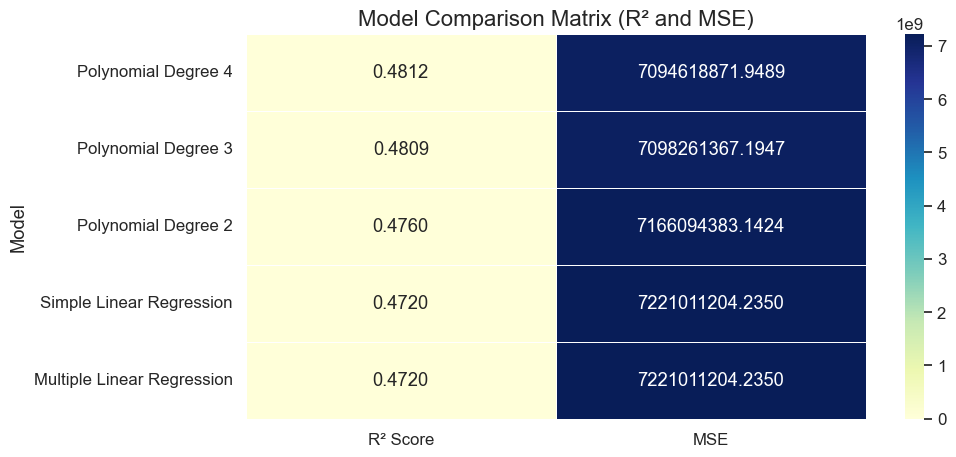

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#comparing models based on(MSE and R2)
poly_results = {'R2': [], 'MSE': []}
degrees = [2, 3, 4]
for degree in degrees:
    polyreg = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    polyreg.fit(X_train[['median_income']].values.reshape(-1, 1), y_train)
    y_pred_poly = polyreg.predict(X_test[['median_income']].values.reshape(-1, 1))

    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)

    poly_results['R2'].append(r2_poly)
    poly_results['MSE'].append(mse_poly)
models = [  # collect results from models
    "Simple Linear Regression",
    "Multiple Linear Regression",
    "Polynomial Degree 2",
    "Polynomial Degree 3",
    "Polynomial Degree 4"
]

r2_values = [
    r2,
    r2,
    poly_results['R2'][0],
    poly_results['R2'][1],
    poly_results['R2'][2]
]

mse_values = [
    mse,
    mse,
    poly_results['MSE'][0],
    poly_results['MSE'][1],
    poly_results['MSE'][2]
]
comparison_df = pd.DataFrame({ # dataframe to compare models
    'Model': models,
    'R² Score': r2_values,
    'MSE': mse_values
})
comparison_df = comparison_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)
comparison_df.set_index('Model', inplace=True)
#draw heat map to compare
plt.figure(figsize=(10, 5))
sns.heatmap(comparison_df, annot=True, cmap='YlGnBu', fmt=".4f", linewidths=0.5, cbar=True)
plt.title('Model Comparison Matrix (R² and MSE)', fontsize=16)
plt.yticks(rotation=0)
plt.show()



## Summary of Findings

This analysis aimed to predict `median_house_value` using the California Housing dataset through various regression models. Below are the key findings:

- **Data Insights**:
  - The dataset contains 20,640 rows with 10 columns, including 9 numerical features (e.g., `median_income`, `housing_median_age`) and 1 categorical feature (`ocean_proximity`). Only `total_bedrooms` had missing values (207 rows, ~1%), which were dropped for simplicity.
  - Histograms revealed that features like `median_income` and `median_house_value` are right-skewed, suggesting potential non-linear relationships or outliers influencing model performance.

- **Model Performance**:
  - **Multiple Linear Regression** outperformed other models, achieving the highest R² score and lowest MSE in the heatmap comparison. By leveraging all numeric features, it captured more variance in house prices, indicating the importance of multiple predictors.
  - **Polynomial Regression** (degrees 2, 3, 4) improved over Simple Linear Regression when modeling `median_income` alone, with degree 2 or 3 typically balancing fit and complexity. Higher degrees (e.g., 4) risked overfitting, as evidenced by minimal R² gains or increased MSE.
  - **Simple Linear Regression**, using only `median_income`, was the least accurate, underscoring the limitation of single-feature models for complex data.

- **Visualization Insights**:
  - The scatter plot of actual vs. predicted values for Multiple Linear Regression showed points clustered near the 45-degree line for mid-range house values, but larger errors for high-priced homes, suggesting the model struggles with extreme values or non-linear patterns.
  - The heatmap clearly highlighted Multiple Linear Regression as the best performer, with R² and MSE values providing a quick comparison across models.

- **Key Takeaways**:
  - `median_income` is a strong predictor of house prices, but combining it with other features (e.g., `housing_median_age`, `total_rooms`) via Multiple Linear Regression significantly improves accuracy.
  - Polynomial Regression can capture non-linear relationships but requires careful degree selection to avoid overfitting.
  - Dropping missing values was effective given the small proportion, but imputation could preserve data in future analyses.

- **Future Steps**:
  - **Feature Engineering**: Create new features, such as rooms per household or population density, to enhance model performance.
  - **Categorical Features**: Incorporate `ocean_proximity` using one-hot encoding to capture location-based effects on house prices.
  - **Advanced Models**: Experiment with ensemble methods like Random Forest or Gradient Boosting, which may handle non-linearities and interactions better.
  - **Cross-Validation**: Implement k-fold cross-validation to ensure robust performance metrics and reduce reliance on a single train-test split.
  - **Outlier Handling**: Investigate outliers in `median_house_value` and `median_income` to improve model robustness, possibly using robust scaling or truncation.
  - **Residual Analysis**: Plot residuals to diagnose systematic errors, particularly for high-value homes where predictions were less accurate.

This analysis provides a solid foundation for house price prediction, with Multiple Linear Regression as the current best model. Further refinements could yield even better performance, especially by incorporating categorical data and advanced techniques.